# <center> DATA 558 Homework 8 </center>
<center> Cathy Jia </center>
<center> Due June 9th, 2019 by 11:59pm </center>

In [1]:
# Display all of the results.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Hide warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from clustering import myspectral
from kernel_pca import kernelPCA

## Exercise 1
**Read Sec. 14.5.3 and Sec. 14.5.4 in Ch. 14 of “The Elements of Statistical Learning”. Code your own spectral clustering algorithm using the Gaussian RBF kernel. Reproduce (the relevant sub-figures of) Figure 14.29.**
- Create simulated dataset

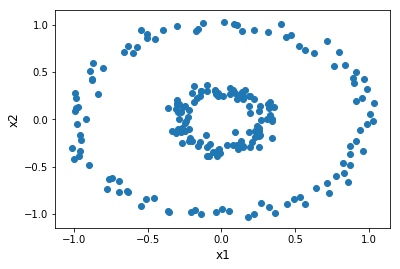

In [2]:
X, y = make_circles(n_samples=200, factor=.3,noise=.05)

txt = plt.figure()
txt = plt.scatter(X[:,0], X[:,1])
txt = plt.xlabel('x1', fontsize=12)
txt = plt.ylabel('x2', fontsize=12)
txt = plt.show()

- Apply spectral clustering algorithm

    Both k-means clustering ang spectral clustering are implemented in python module clustering.py

In [3]:
# Apply spectral clustering
mycluster = myspectral(k=2)
mycluster.fit(X)
mylabels = mycluster.labels.astype(int)
eigval = mycluster.eigval
eigvec = mycluster.eigvec

- Reproduce Figure 14.29

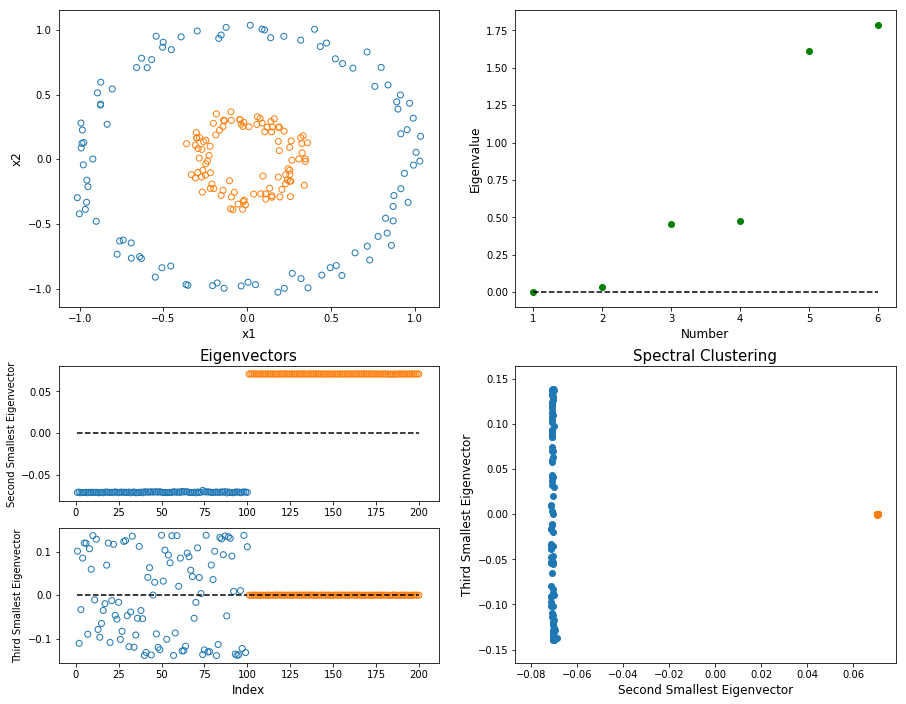

In [4]:
# Spectral clustering plots
fig = plt.figure(figsize=(15, 12))
outer = gridspec.GridSpec(2, 2)
ax1 = fig.add_subplot(outer[0, 0])
ax2 = fig.add_subplot(outer[0, 1])
inner = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=outer[2])
ax3 = fig.add_subplot(inner[0, 0])
ax4 = fig.add_subplot(inner[1, 0])
ax5 = fig.add_subplot(outer[1, 1])
colors = ['tab:blue', 'tab:orange']

# Clustering result
for label in range(len(mycluster.centers)):
    txt = ax1.scatter(X[mylabels==label][:,0], X[mylabels==label][:,1],
                      marker='o', color=colors[label], facecolors='none')
txt = ax1.set_xlabel('x1', fontsize=12)
txt = ax1.set_ylabel('x2', fontsize=12)

# Eigenvalues over number
arr = range(1,len(eigval)+1)
txt = ax2.scatter(arr, list(eigval), color='g')
txt = ax2.plot(arr, [0]*len(eigval), '--', color='k')
txt = ax2.set_xlabel('Number', fontsize=12)
txt = ax2.set_ylabel('Eigenvalue', fontsize=12)

# Eigenvectors over index
start = 1
for label in range(len(mycluster.centers)):
    cnt = list(mylabels).count(label)
    arr = range(start, cnt+start)
    txt = ax3.plot(arr, [0]*len(arr), '--', color='k')
    txt = ax4.plot(arr, [0]*len(arr), '--', color='k')
    txt = ax3.scatter(arr, eigvec[1][mylabels==label],
                      marker='o', color=colors[label], facecolors='none')
    txt = ax4.scatter(arr, eigvec[2][mylabels==label],
                      marker='o', color=colors[label], facecolors='none')
    start += cnt
txt = ax3.set_title('Eigenvectors', fontsize=15)
txt = ax4.set_xlabel('Index', fontsize=12)
txt = ax3.set_ylabel('Second Smallest Eigenvector')
txt = ax4.set_ylabel('Third Smallest Eigenvector')

# First two smallest eigenvectors comparison
for label in range(len(mycluster.centers)):
    txt = ax5.scatter(eigvec[1][mylabels==label], eigvec[2][mylabels==label],
                      marker='o', color=colors[label])
txt = ax5.set_title('Spectral Clustering', fontsize=15)
txt = ax5.set_xlabel('Second Smallest Eigenvector', fontsize=12)
txt = ax5.set_ylabel('Third Smallest Eigenvector', fontsize=12)

Two-circle example illustrating spectral clustering. Data in top left are 200 points falling in two concentric clusters of 100 points each. The data points are colored in cluster labels in the top left. The 6 smallest eigenvalues are shown in the top right panel. The coordinates of the 2nd and 3rd eigenvectors are plotted in the bottom right panel.

## Exercise 2
**Read Sec. 14.5.3 and Sec. 14.5.4 in Ch. 14 of “The Elements of Statistical Learning”. Code your own kernel principal component analysis algorithm using the Gaussian RBF kernel. Reproduce (the relevant sub-figures of) Figure 14.30.**

Kernel principal component analysis algorithm is implemented in python module kernel_pca.py

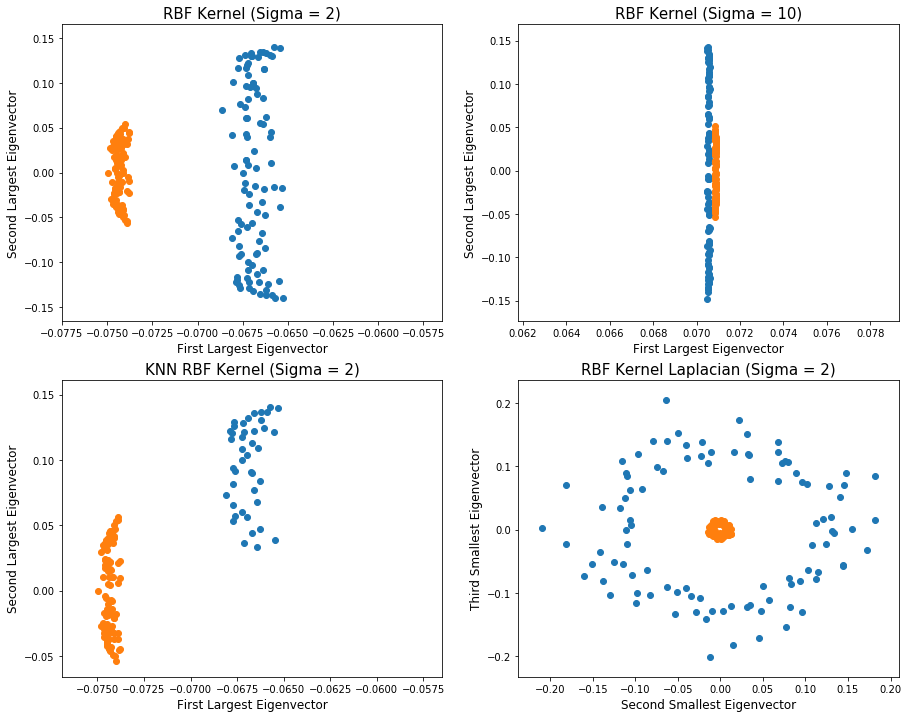

In [5]:
# Kernel plots
fig = plt.figure(figsize=(15, 12))
grid = gridspec.GridSpec(2, 2)
ax1 = fig.add_subplot(grid[0, 0])
ax2 = fig.add_subplot(grid[0, 1])
ax3 = fig.add_subplot(grid[1, 0])
ax4 = fig.add_subplot(grid[1, 1])
colors = ['tab:blue', 'tab:orange']

# RBF kernel, sigma = 2
pca = kernelPCA(k=2, sigma=2)
pca.fit(X)
eigval = pca.eigval
eigvec = pca.eigvec
for label in range(2):
    txt = ax1.scatter(eigvec[0][y==label], eigvec[1][y==label],
                      marker='o', color=colors[label])
txt = ax1.set_title('RBF Kernel (Sigma = 2)', fontsize=15)
txt = ax1.set_xlabel('First Largest Eigenvector', fontsize=12)
txt = ax1.set_ylabel('Second Largest Eigenvector', fontsize=12)

# RBF kernel, sigma = 10
pca = kernelPCA(k=2, sigma=10)
pca.fit(X)
eigval = pca.eigval
eigvec = pca.eigvec
for label in range(2):
    txt = ax2.scatter(eigvec[0][y==label], eigvec[1][y==label],
                      marker='o', color=colors[label])
txt = ax2.set_title('RBF Kernel (Sigma = 10)', fontsize=15)
txt = ax2.set_xlabel('First Largest Eigenvector', fontsize=12)
txt = ax2.set_ylabel('Second Largest Eigenvector', fontsize=12)

# KNN RBF kernel, sigma = 2
pca = kernelPCA(k=2, sigma=2, mode='knn')
pca.fit(X)
mylabels = pca.labels
eigval = pca.eigval
eigvec = pca.eigvec
for label in range(2):
    txt = ax3.scatter(eigvec[0][mylabels==label], eigvec[1][mylabels==label],
                      marker='o', color=colors[label])
txt = ax3.set_title('KNN RBF Kernel (Sigma = 2)', fontsize=15)
txt = ax3.set_xlabel('First Largest Eigenvector', fontsize=12)
txt = ax3.set_ylabel('Second Largest Eigenvector', fontsize=12)

# RBF kernel Laplacian, sigma = 2
pca = kernelPCA(k=2, sigma=2, mode='laplacian')
pca.fit(X)
eigval = pca.eigval
eigvec = pca.eigvec
for label in range(2):
    txt = ax4.scatter(eigvec[1][y==label], eigvec[2][y==label],
                      marker='o', color=colors[label])
txt = ax4.set_title('RBF Kernel Laplacian (Sigma = 2)', fontsize=15)
txt = ax4.set_xlabel('Second Smallest Eigenvector', fontsize=12)
txt = ax4.set_ylabel('Third Smallest Eigenvector', fontsize=12)

Kernel principal components applied to the two-circle example, using different kernels. (Top left:) RBF kernel with sigma = 2. (Top right:) RBF kernel with sigma = 10. (Bottom left): Nearest neighbor RBF kernel with sigma = 2 from spectral clustering. (Bottom right:) Spectral clustering with Laplacian constructed from the RBF kernel with sigma = 2.